# Part 1: Simple Pendulum Simulation


In [1]:
# Import all the libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


In [2]:
# functions for RK2 and RK4
'''
Input
-----
- f: rate of change, function dy/dt = f(t,y)
- t_i: time at the current point i
- y_i: value of y a the current point i 
- interval: tuple with initial and final times
- k: step size

Output:
- y_next: estimated value of y at the next point i+1

Notice that this implementation follows a different paradigm
than the one of session 2 (the functions are the main formulas 
and return only the next value of y). 
The intention is to help make it  a little  more clear how 
Euler's method is used inside of the Runge-Kutta methods, 
and how a "better slope" is achieved in all methods that aim 
to improve Euler's.

Your main task is to implement RK4, ideally building upon the 
same structure of the code.
'''

def forwardEuler(f, t_i, y_i, dt):
    y_next = y_i + dt*f(t_i, y_i)
    return y_next

def rungeKutta2(f, t_i, y_i, dt):
    y_star = forwardEuler(f, t_i, y_i, dt)
    An = f(t_i, y_i)
    Bn = f(t_i + dt, y_star)
    better_slope = (An + Bn) / 2

    y_next = y_i + dt*better_slope
    return y_next 

def rungeKutta4(f, t_i, y_i, k):
    An = f(t_i, y_i)
    Bn = f((t_i + k/2), (y_i + (k*An)/2))
    Cn = f(t_i + k/2, y_i + (k*Bn)/2)
    Dn = f(t_i + k, y_i + k*Cn)
    better_slope = (An + 2*Bn + 2*Cn + Dn)/6

    y_next = y_i + k*better_slope
    return y_next


In [43]:
# Pendulum

'''
Attributes
----------
- ts (list)      : saves the time steps
- g (float)      : value for gravitational constant in m/s
- L (float)      : value for the length of the rope in m
- b (float)      : value for dampening term 
- step (float)   : value for the step size (in seconds)
- thetas (list)  : list of angular positions (angles are in radians)
- angVels (list) : list of angular velocities (in radians per second)
- pos (list)     : x and y coordinates for the pendulum's bob if we define the
                    fixed end of the rope as our origin. (how would you get those?)

Methods
-------
- update        : uses RK4 to update the variables
- displayGraphs : display graphs of time vs position, time vs velocity, and 
                  position vs velocity

*The animation function was provided in another cell
'''

class SimplePendulum:
  '''
  This function initializes the class. The attributes are described above and
  the following are not options: theta, angVel, and stepSize.
  '''
  def __init__(self, theta, angVel, stepSize, length = 3, dampening = 0, 
               forcing_mag = 0, forcing_freq = 0):
    self.ts = [0]
    self.g = 9.8
    self.L = length
    self.b = dampening
    self.step = stepSize
    self.thetas = [theta]
    self.angVels = [angVel]
    self.pos = [np.array((length*np.sin(theta), length-length*np.cos(theta)))]
    self.states = [np.array((theta, angVel))]
    self.famp = forcing_mag
    self.ffreq = forcing_freq

  def derivatives(self, t, states):
    g = self.g
    L = self.L
    b = self.b
    famp = self.famp
    ffreq = self.ffreq
    theta_temp = states[0]
    angVel_temp = states[1]
    theta_prime = angVel_temp
    angVel_prime =-(g/L)*np.sin(theta_temp) -b*angVel_temp +famp*np.cos(ffreq*t)

    return np.array((theta_prime, angVel_prime))    
  
  '''
  Updates the variables using RK4. Remember not only to add the new position and
  velocity to their respective lists but also to update the parameter self.pos in
  case you want to use the animation provided
  '''
  def update(self):
    states_next = rungeKutta4(self.derivatives, self.ts[-1], self.states[-1], 
                              self.step)
    while states_next[0] > np.pi:
      states_next[0] -= 2*np.pi
    while states_next[0] < -np.pi:
      states_next[0] += 2*np.pi
    self.states.append(states_next)
    self.thetas.append(states_next[0])
    self.angVels.append(states_next[1])
    self.ts.append(self.ts[-1] + self.step)
    self.pos.append(np.array((self.L*np.sin(self.thetas[-1]), 
                              self.L-self.L*np.cos(self.thetas[-1]))))


  '''
  This function should plot the following graphs:
  - time vs angular position
  - time vs angular velocity
  - angular position vs angular velocity
  '''
  def displayGraphs(self):
    %matplotlib inline
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(self.ts, self.angVels)
    plt.xlabel('Time (in seconds)')
    plt.ylabel('Angular Velocity (radians per second)')
    plt.title('Time vs Angular velocity')
    plt.subplot(1, 3, 2)
    plt.plot(self.ts, self.thetas)
    plt.xlabel('Time (in seconds)')
    plt.ylabel('Position (radians)')
    plt.title('Time vs Position')
    plt.subplot(1, 3, 3)
    plt.plot(self.thetas, self.angVels, 'bo')
    plt.xlabel('Position (in Radians)')
    plt.ylabel('Angular Velocity (radians per second)')
    plt.title('Position vs Angular velocity')
    plt.tight_layout()
    plt.show()

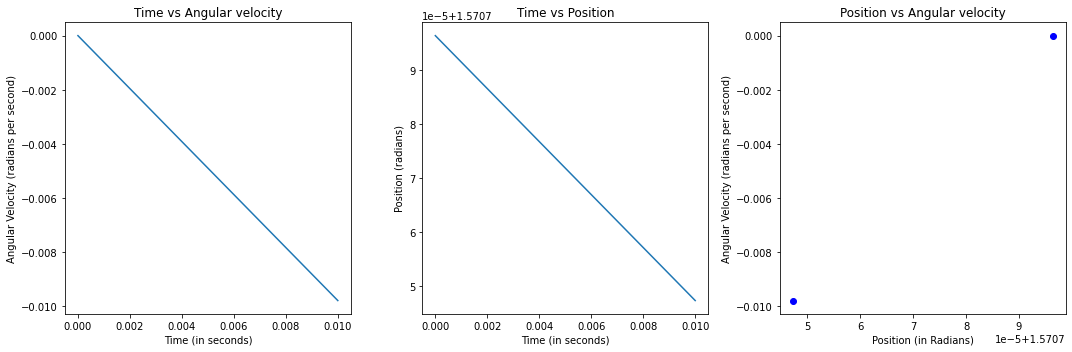

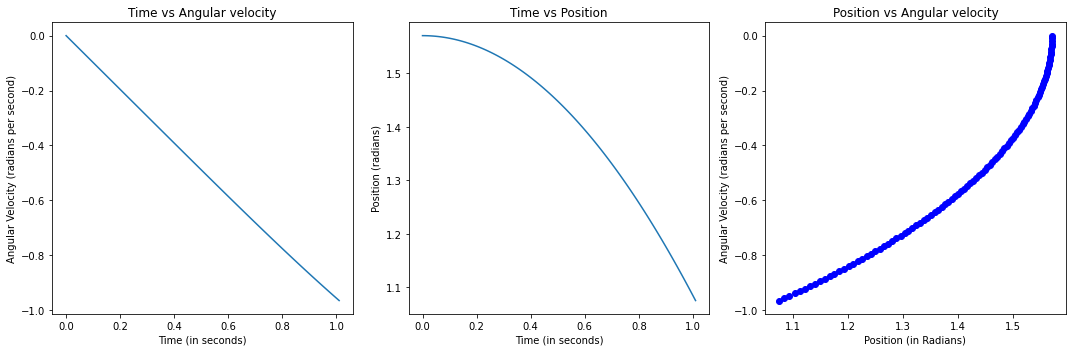

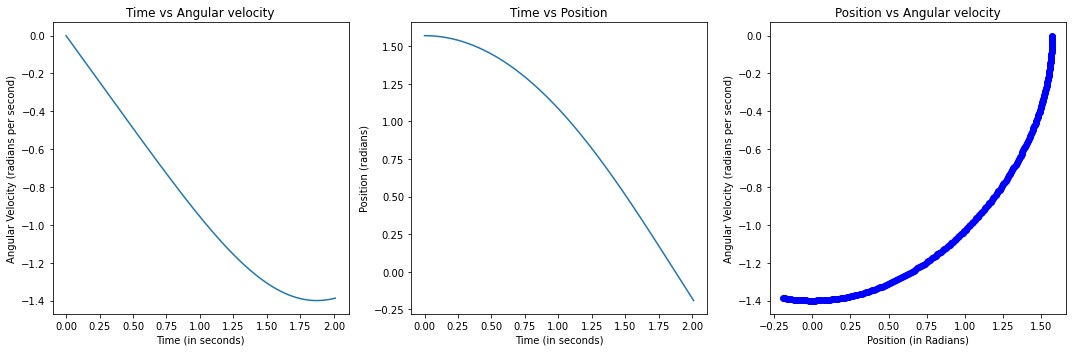

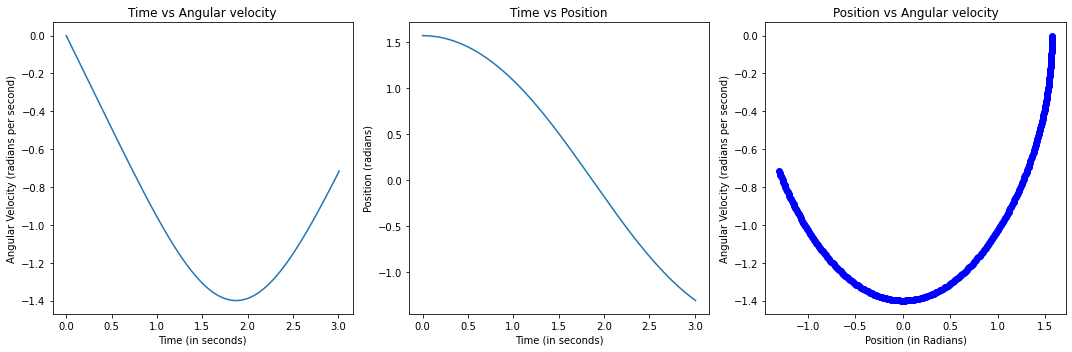

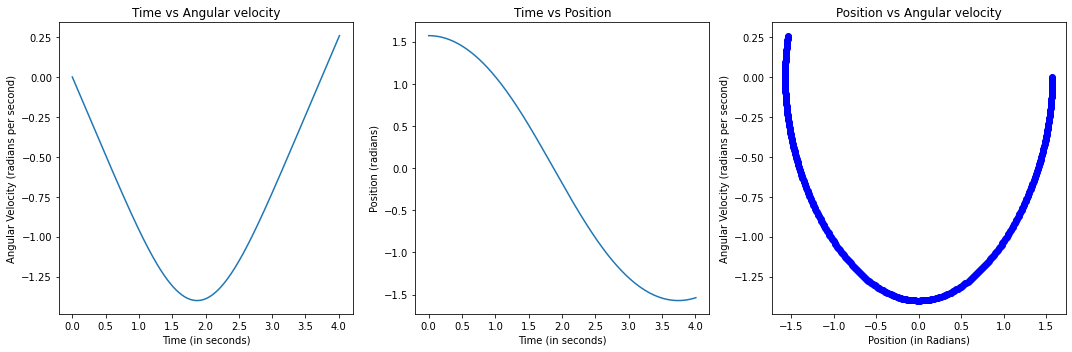

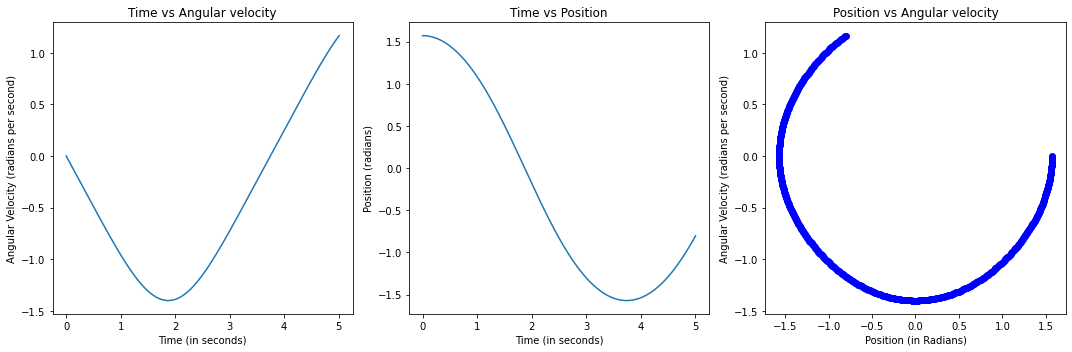

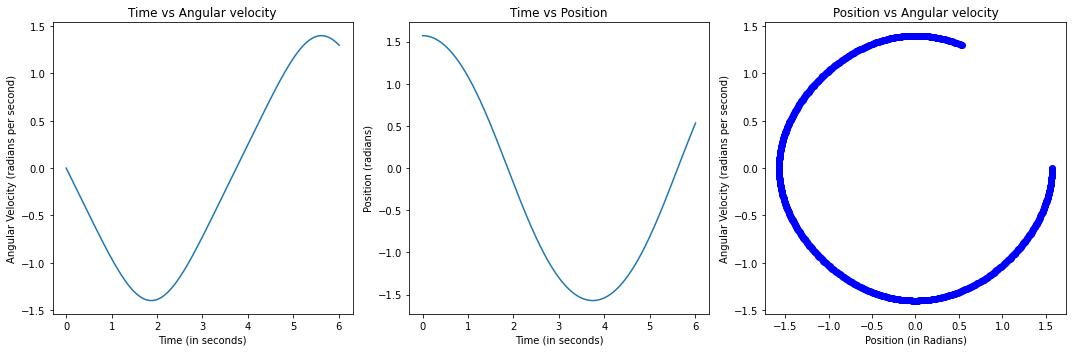

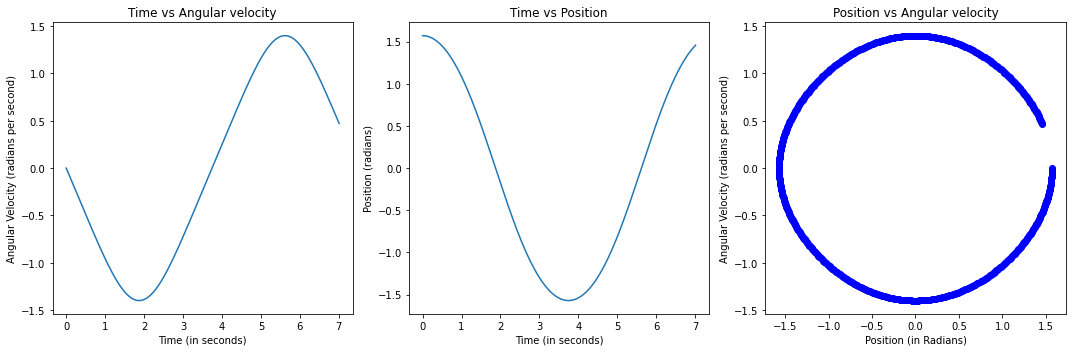

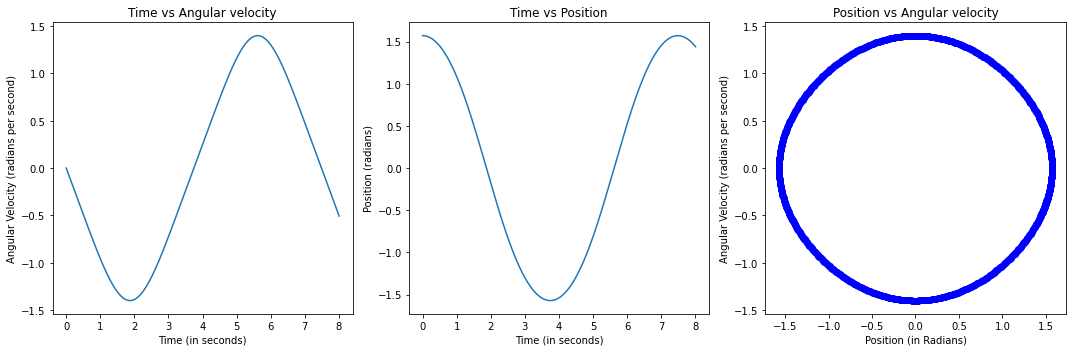

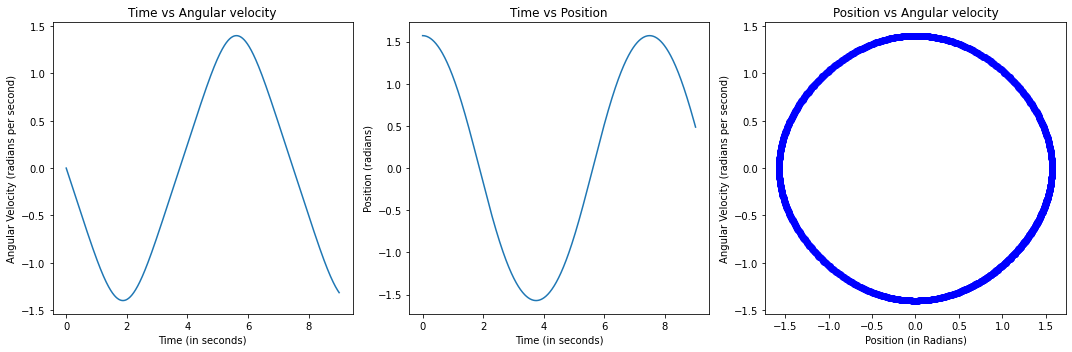

In [44]:
# Task 5 test code
simplependulum_test = SimplePendulum(np.pi/2, 0, 0.01, 10)

for i in range(1000):
  simplependulum_test.update()
  if i%100 == 0:
    simplependulum_test.displayGraphs()

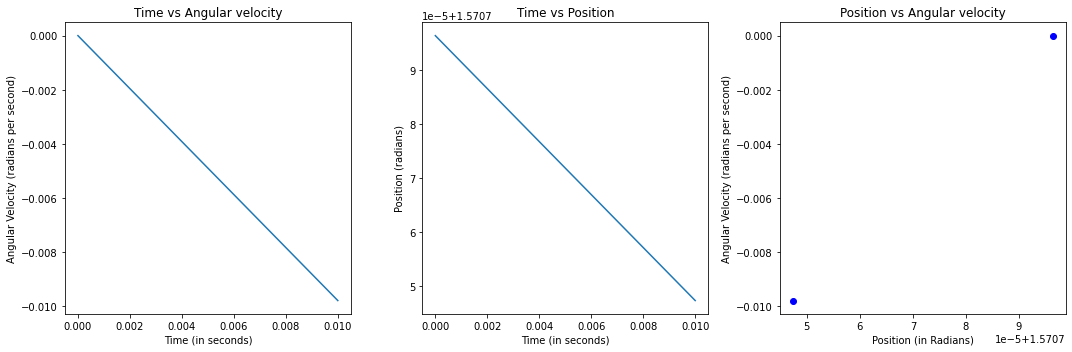

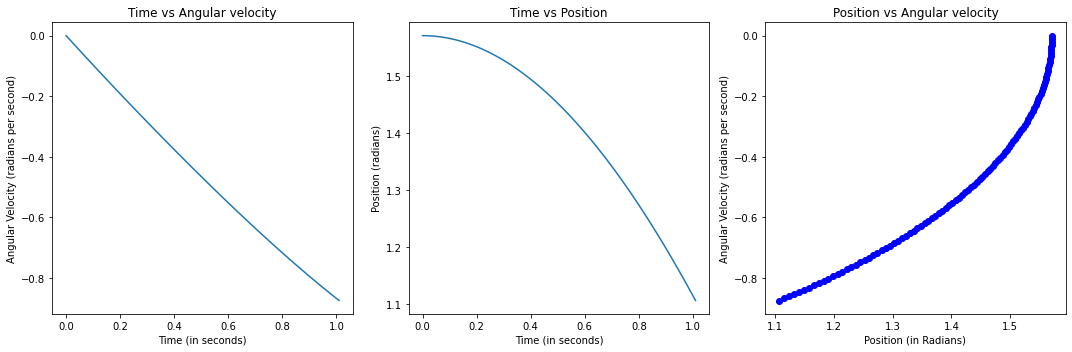

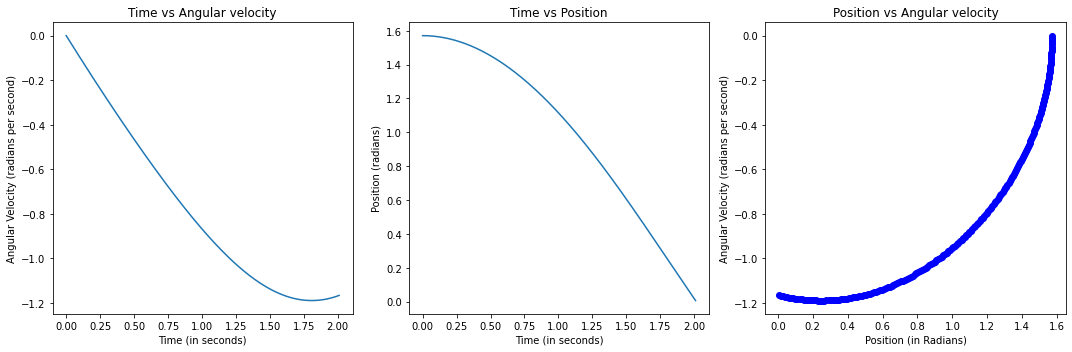

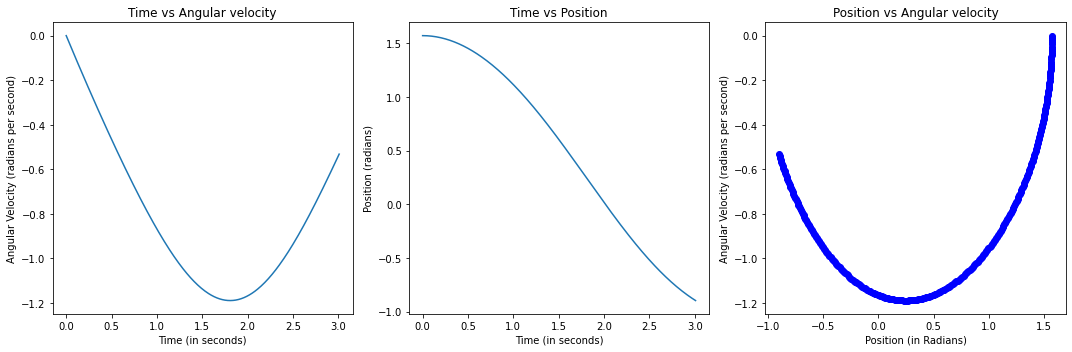

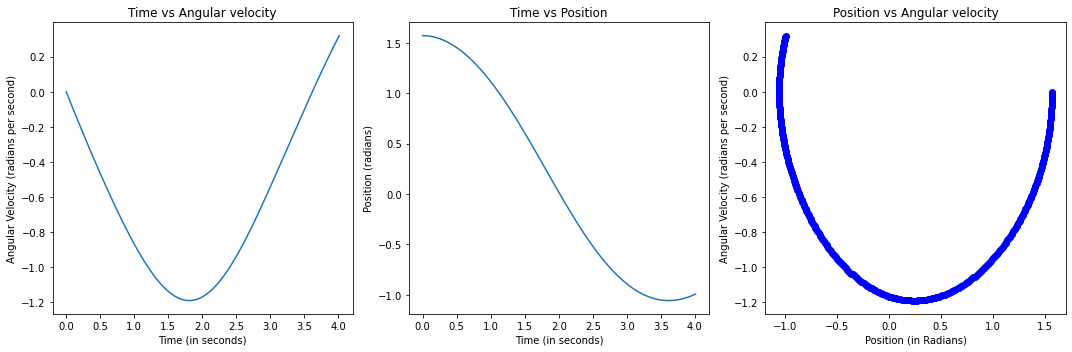

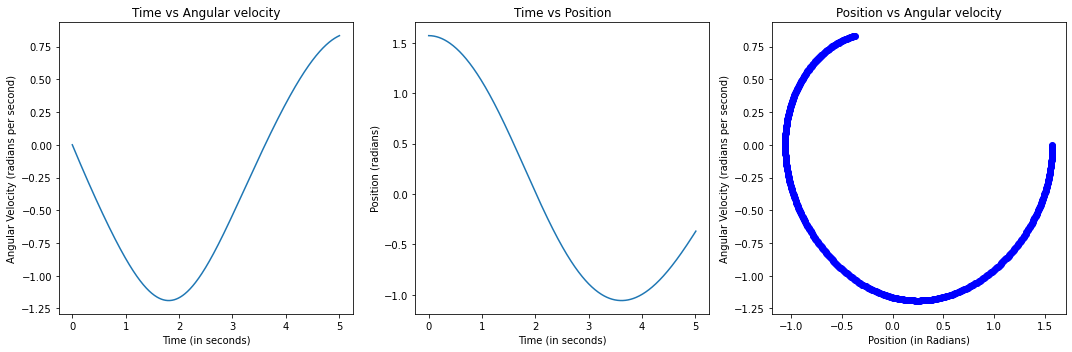

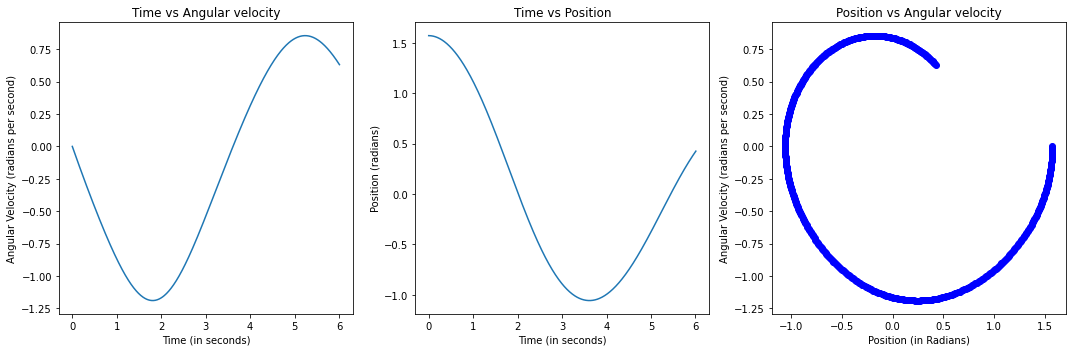

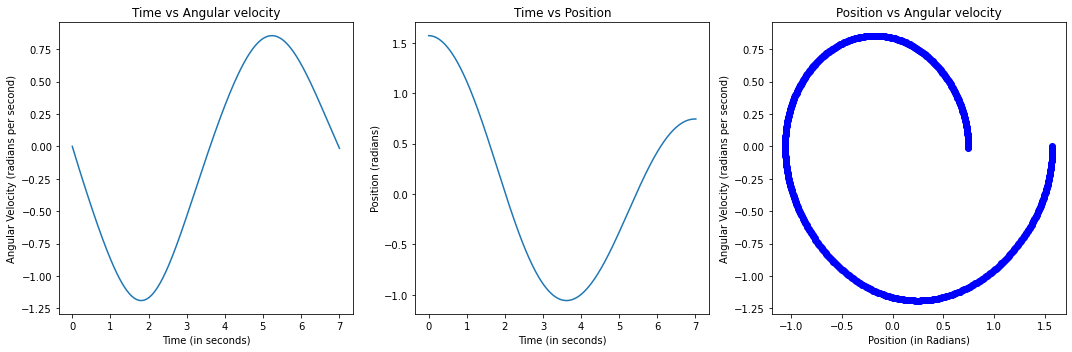

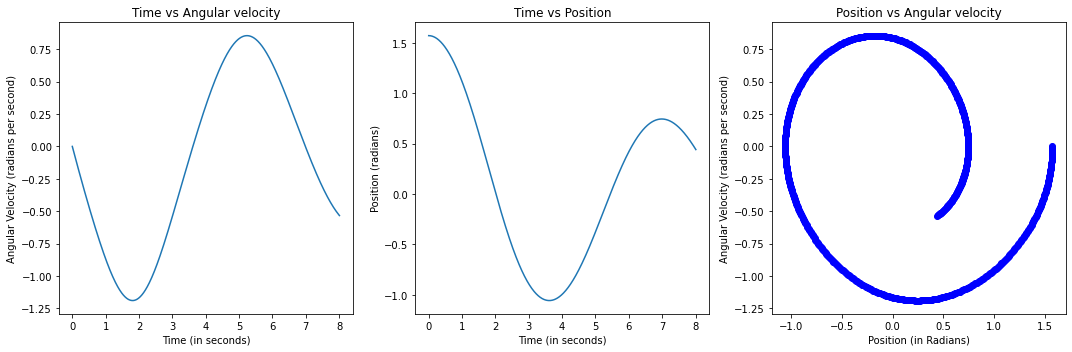

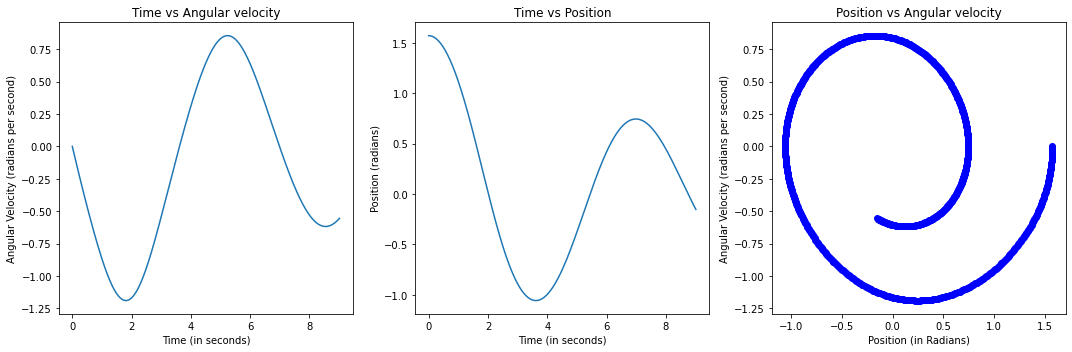

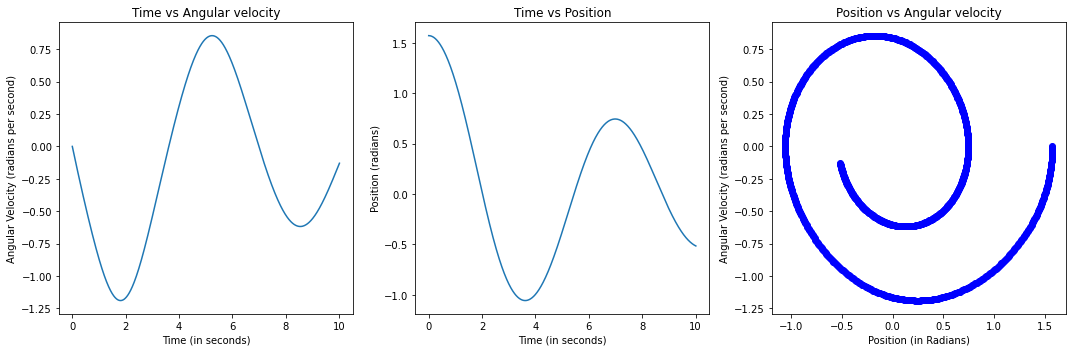

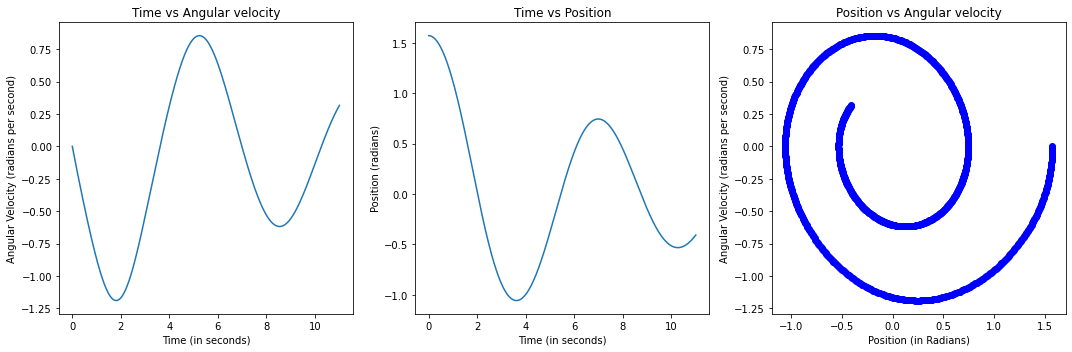

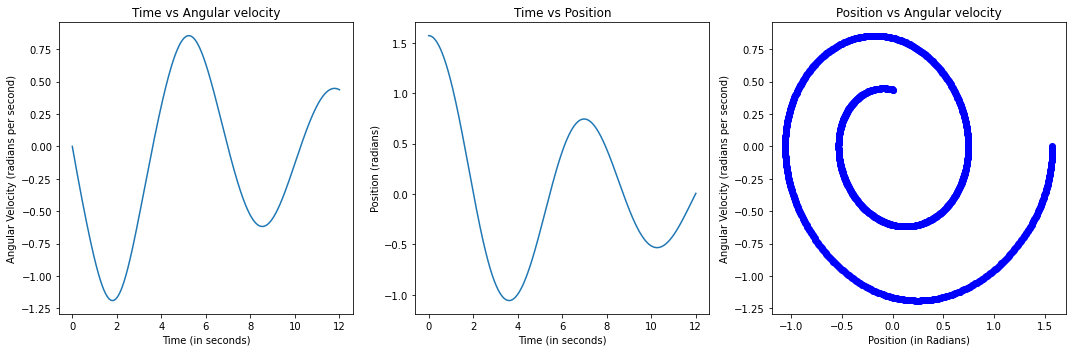

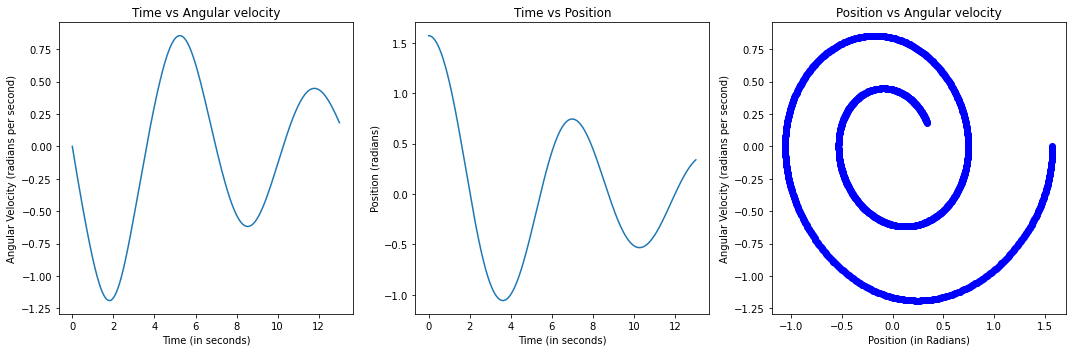

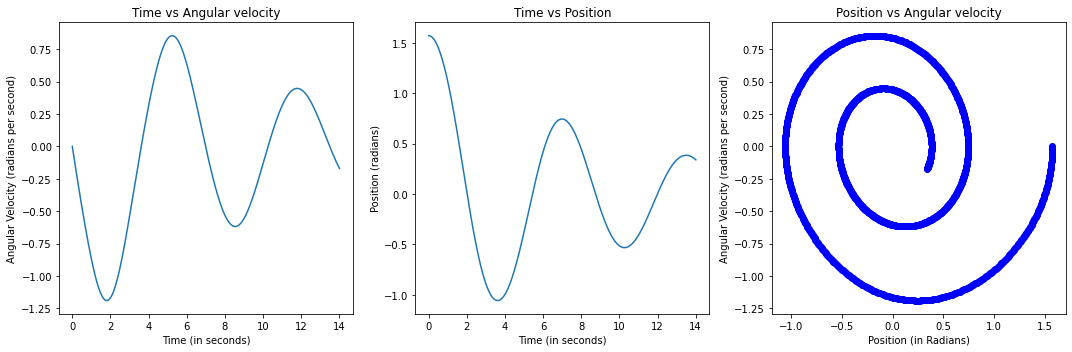

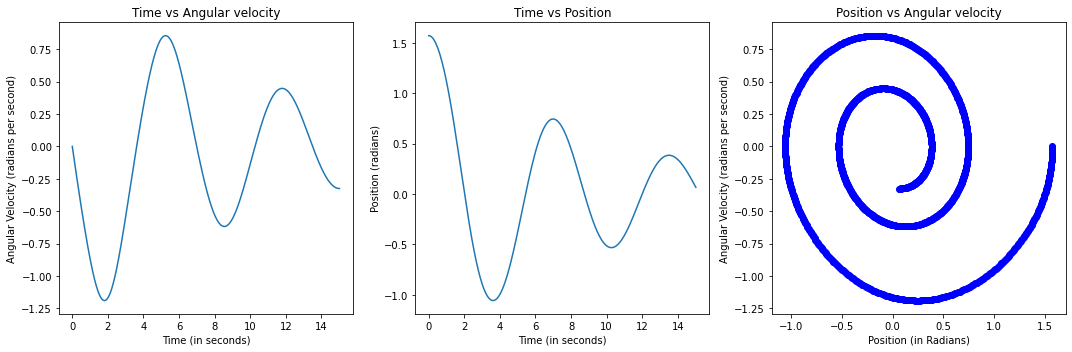

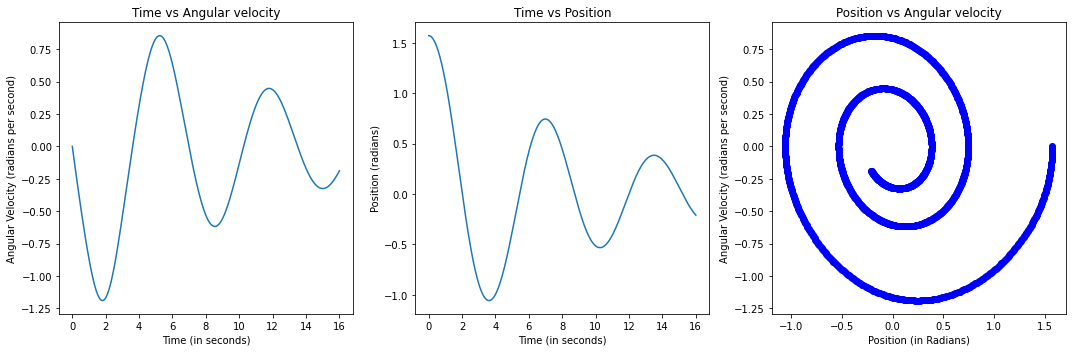

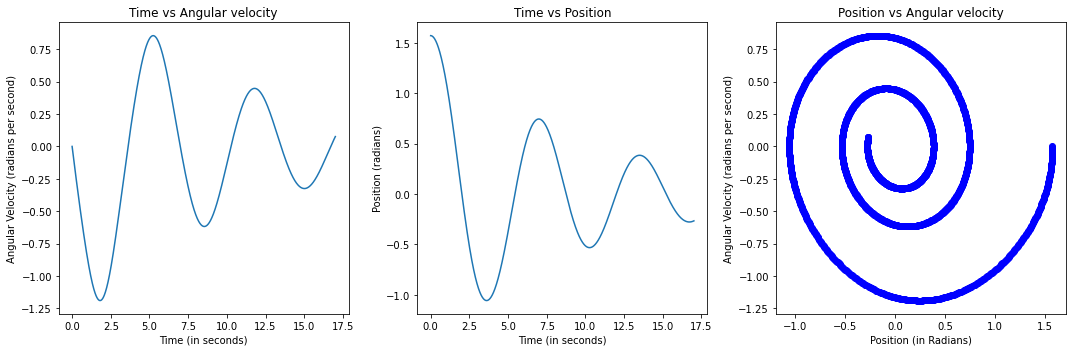

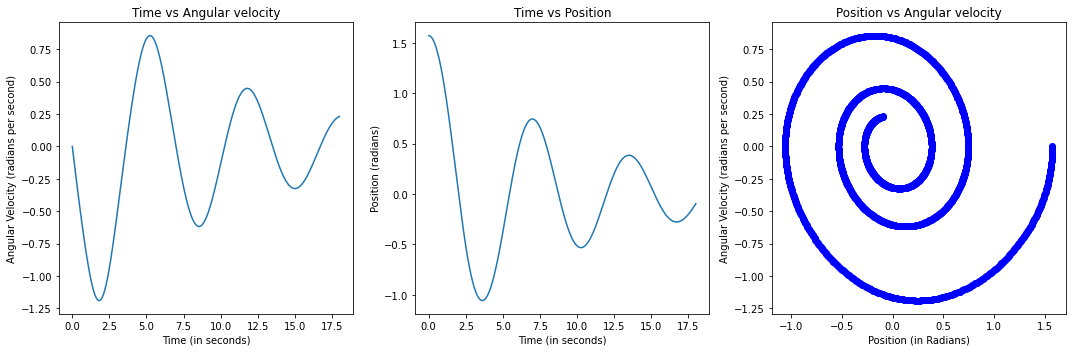

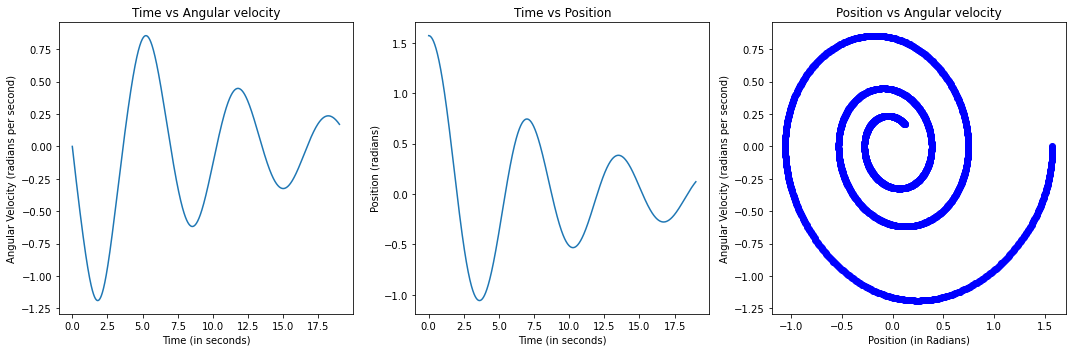

In [45]:
#Task 7 test code
simplependulum_test2 = SimplePendulum(np.pi/2, 0, 0.01, 10, 0.2)

for i in range(2000):
  simplependulum_test2.update()
  if i%100 == 0:
    simplependulum_test2.displayGraphs()

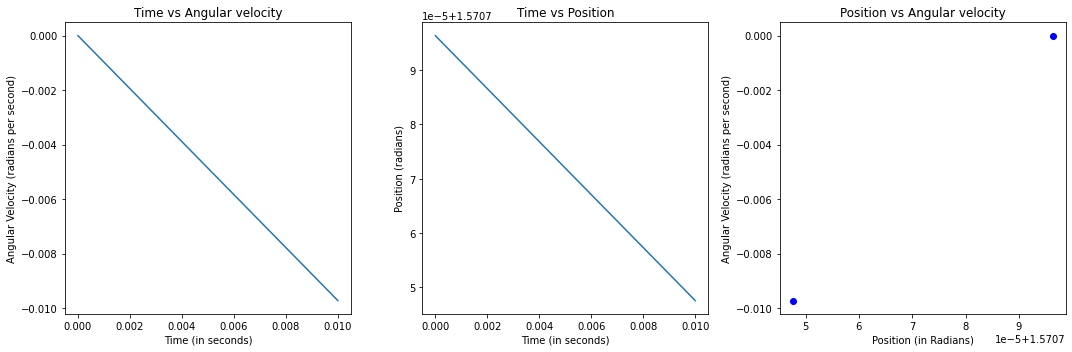

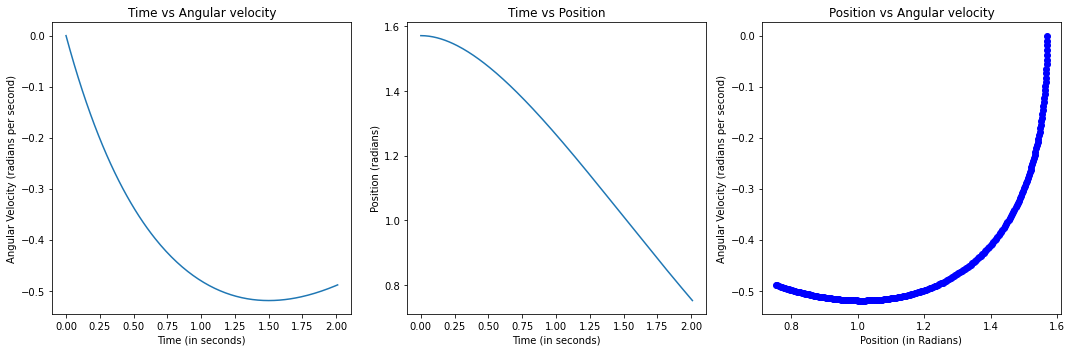

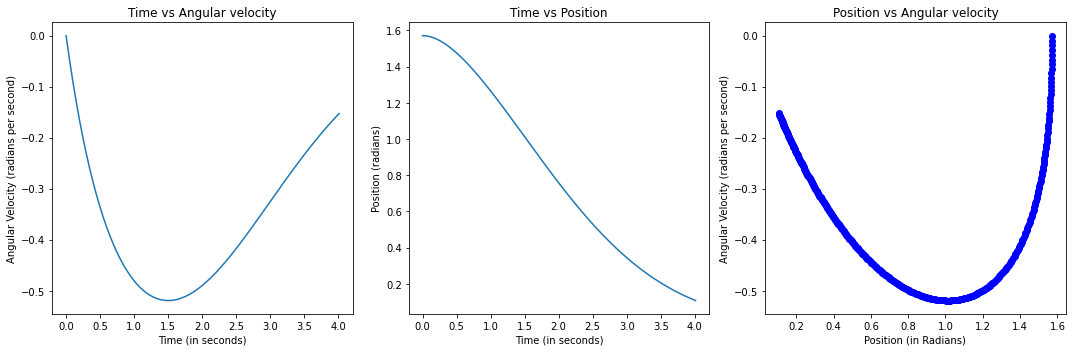

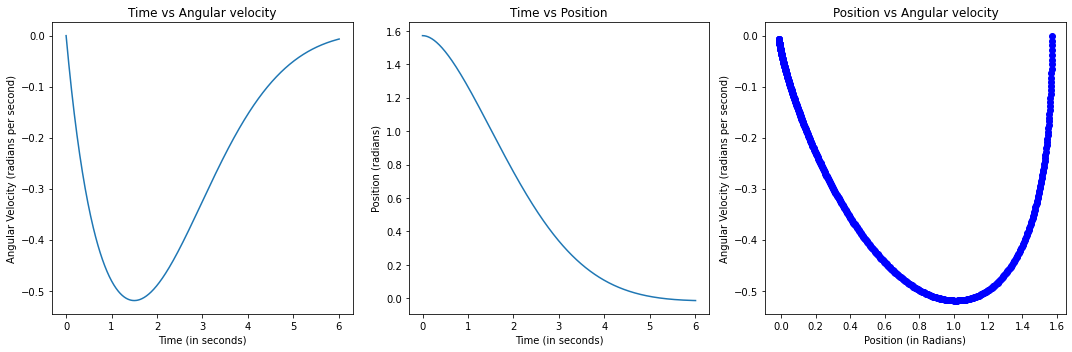

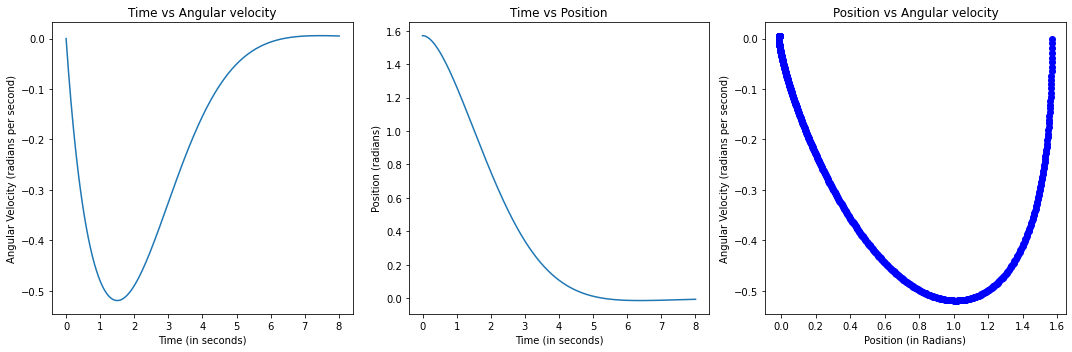

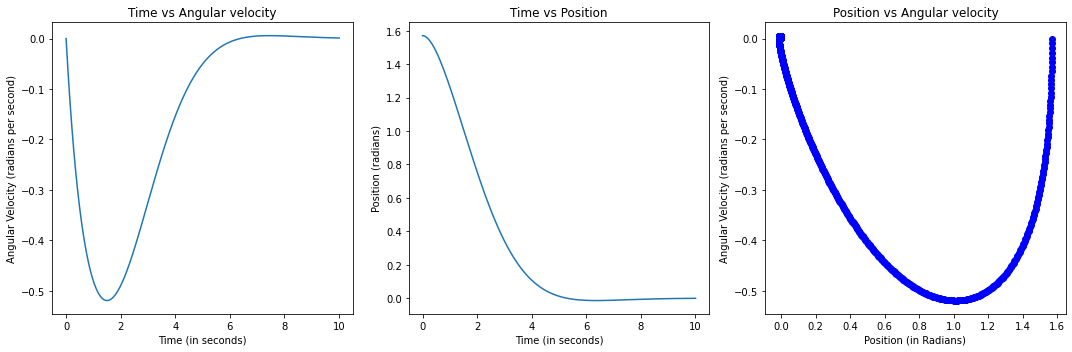

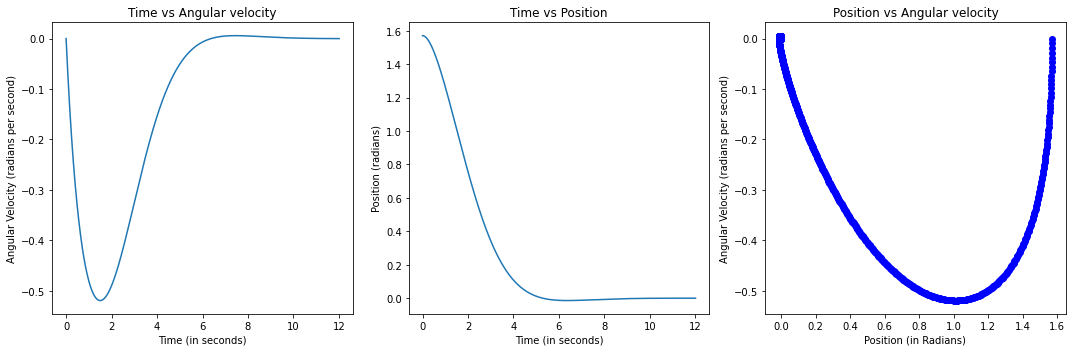

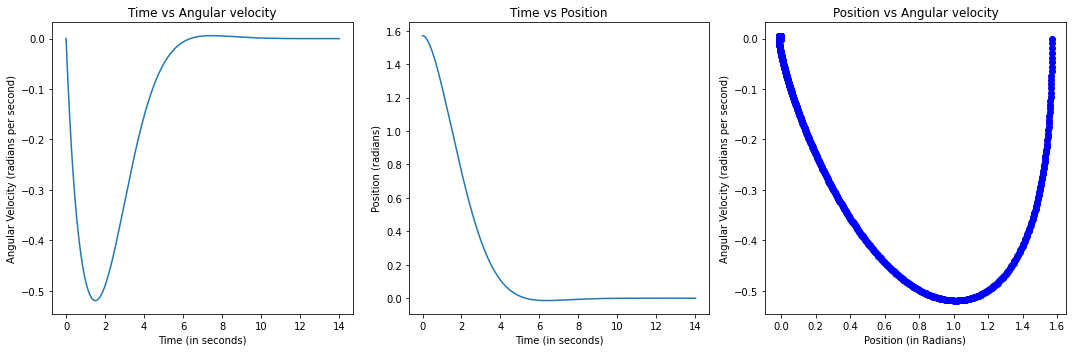

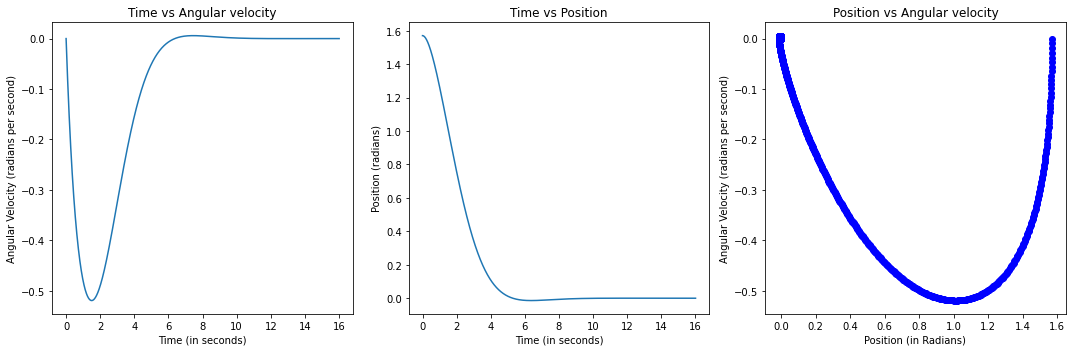

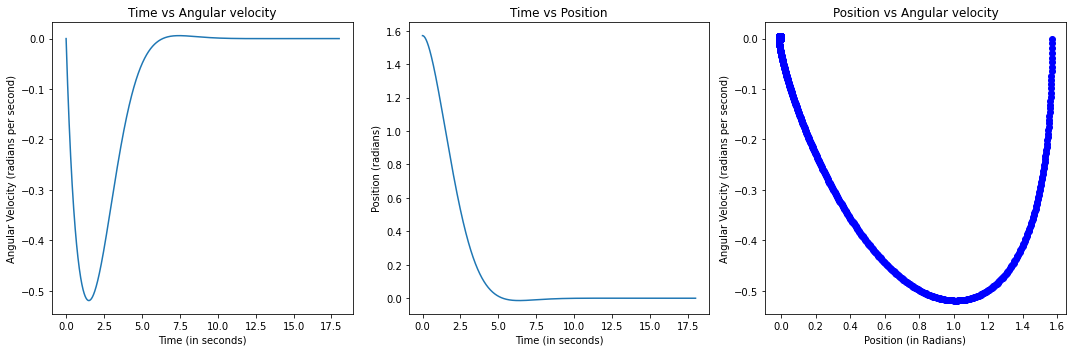

In [46]:
# task 8

simplependulum_test3 = SimplePendulum(np.pi/2, 0, 0.01, 10, 1.6)

for i in range(2000):
  simplependulum_test3.update()
  if i%200 == 0:
    simplependulum_test3.displayGraphs()

# Part 2: Forcing and chaotic behavior analysis

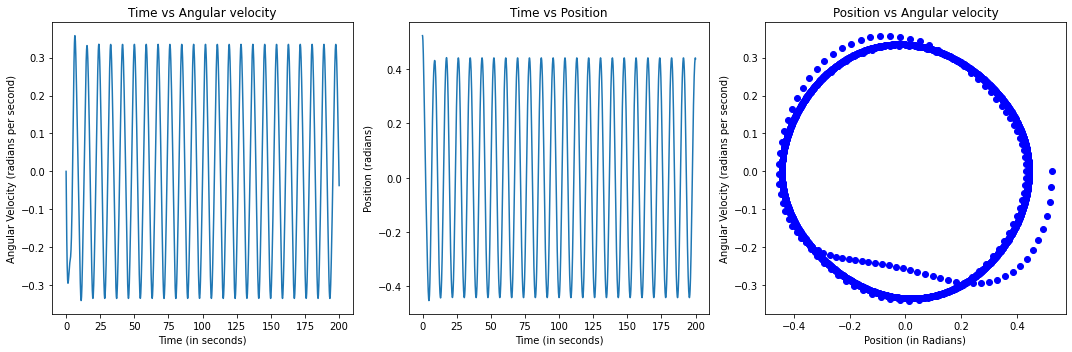

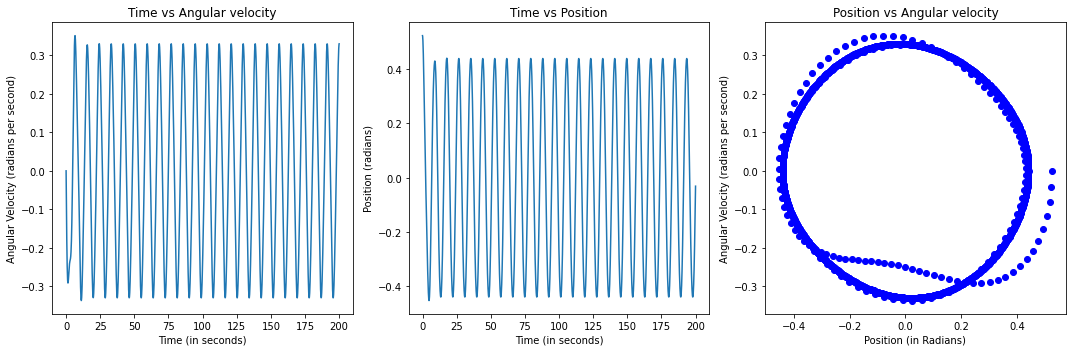

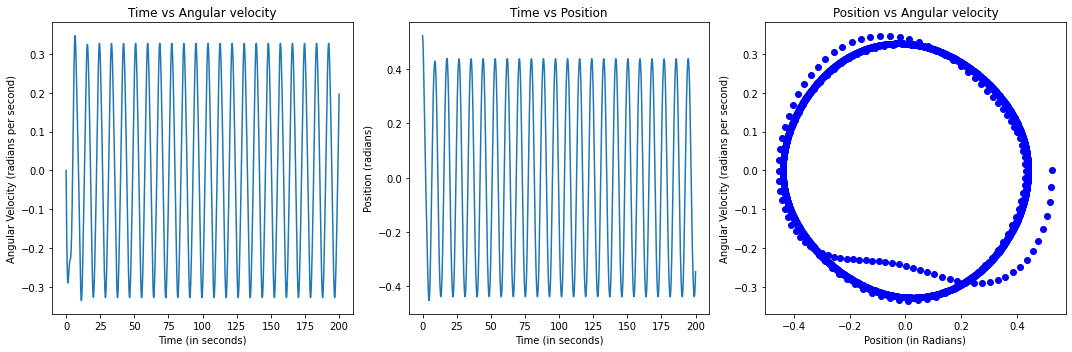

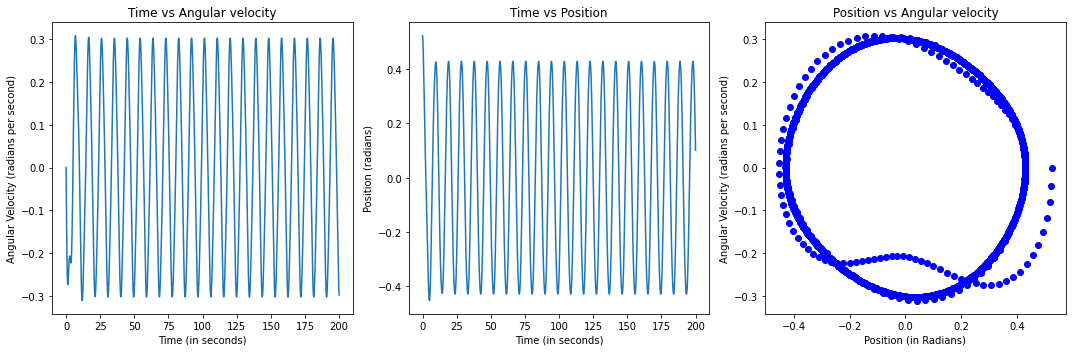

In [47]:
#The forcing term was added in the pendulum class
#length =3
ws = [0.724, 0.715, 0.711, 0.667]
k = 0.1
theta_0 = np.pi/6
vel_0 = 0
b = 0.5
a = 1.2

for w in ws:
  test_pend = SimplePendulum(theta_0, vel_0, k, dampening=b, forcing_mag=a, 
                              forcing_freq=w)
  for i in range(2000):
    test_pend.update()
  test_pend.displayGraphs()

From the graphs above, it does not seem that changing the frequency by a little bit changes the results. The phase space plot shows that the evolution and final state of the system are almost the same. But, we do see that higher the driving frequency, the faster the system moves towards a stable oscillation. This oscillation depends on the driving force and frequency as we have seen in CS154.


Hence, we do not see any chaotic behavior in this case by just looking at the phase space plots.
I am not sure if this is what we are supposed to see. I checked the source for Poincare plots, and also checked online, and it seems that the motion is chaotic at w = 0.667, but I do not see any chaotic behavior in my system. It also seems my phase space plots are a bit different for even other initial conditions. My plots seem to be a lot more "circular" than any other plots that I have come across. But I do not understand what is it in my simulation that makes a chaotic behavior vanish. I thought it may be that I do not restrict my $θ$ values between -$π$ and $π$, but printing the $\theta$ values do not go over 0.55


So I am not really sure what is going wrong. I would appreciate some feedback on it 👱

Ok, nevermind, I figured it out. The reason was the length of my pendulum. The assignment problem did not specify the pendulum length and my above code is using length = 3. Whereas, the chaotic behavior occurs for length=10. For this, I also need to make sure the position is restricted between -$π$ and $π$. This also meant that I had to replace the phase plots from being lineplots to being scatter plots with points being disjoint.


But since I spent so much time writing the rant above, I am leaving it there.

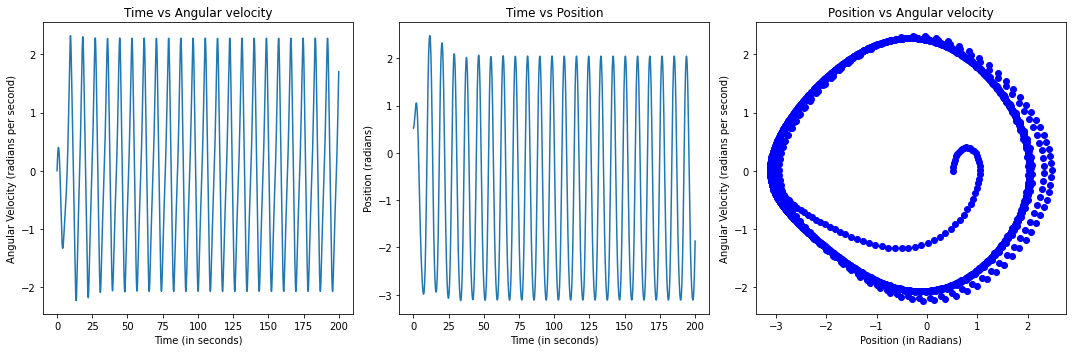

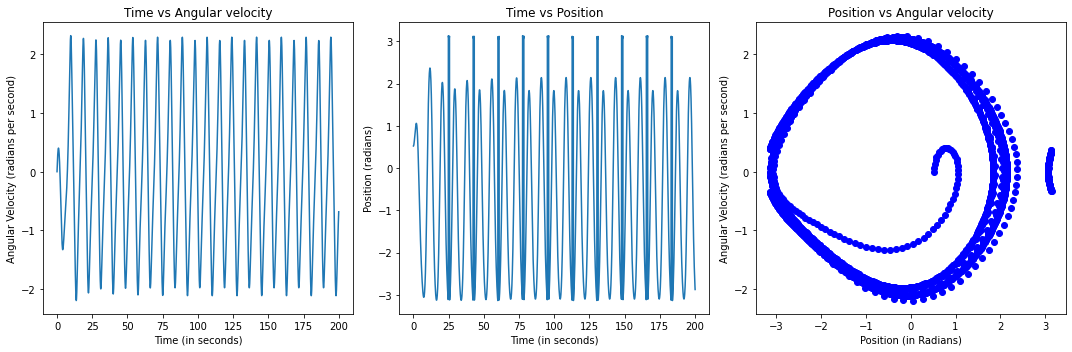

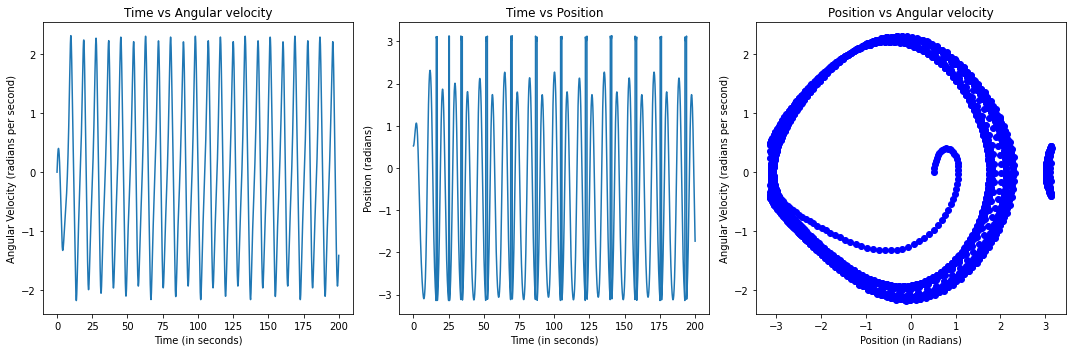

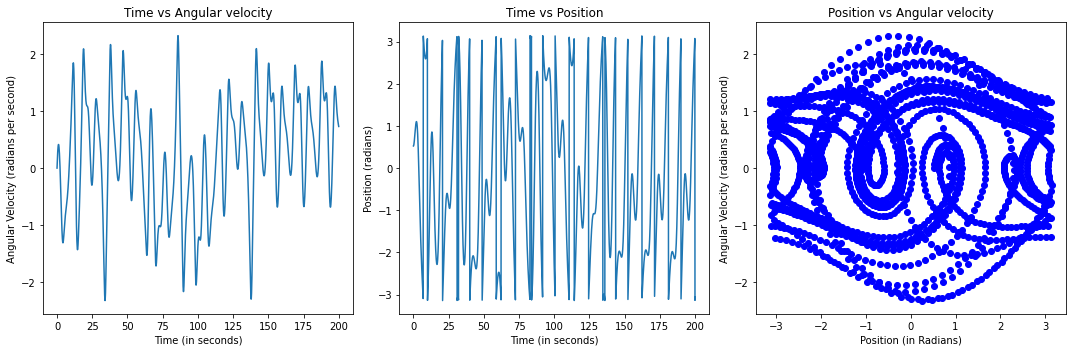

In [48]:
ws = [0.724, 0.715, 0.711, 0.667]
k = 0.1
theta_0 = np.pi/6
vel_0 = 0
b = 0.5
a = 1.2

for w in ws:
  test_pend = SimplePendulum(theta_0, vel_0, k, length=10 , dampening=b, forcing_mag=a, 
                              forcing_freq=w)
  for i in range(2000):
    test_pend.update()
  test_pend.displayGraphs()

Now, as we can clearly see from above, the system behaves as a chaotic system for w = 0.667. For other values of frequency, the system eventually falls into an oscillatory behavior.